# Consumer Behaviour Analysis

Investigate the impact of various factors, including seasonality, item attributes (size and color), and promotional activities (discounts and promotions), on customer purchase decisions. Which products perform better in specific seasons? 

Analyze the relationship between customer demographics (age and gender) and their purchase behavior.

In [2]:
# Import libraries 
import  plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import dataset 
data=pd.read_csv("shopping_behavior_updated.csv")
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
# Info about the data 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
# Inspect the shape 

data.shape

(3900, 18)

In [6]:
# Get summary statistics 

data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [7]:
# Inspect the columns 

data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [8]:
# Preview the data

data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [9]:
# Check for and remove any unnecessary columns, remove Customer ID column, is it the same as the index

data.drop(columns = {"Customer ID"}, inplace = True)


In [10]:
# Check for changes 
data.sample(5)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1803,60,Male,Sneakers,Footwear,97,New Hampshire,S,Gray,Summer,3.5,No,Free Shipping,No,No,33,Venmo,Fortnightly
644,68,Male,Backpack,Accessories,93,Louisiana,S,Blue,Summer,4.3,Yes,Next Day Air,Yes,Yes,37,Cash,Weekly
1770,53,Male,Backpack,Accessories,22,Michigan,M,Pink,Fall,4.3,No,Express,No,No,34,Bank Transfer,Weekly
3392,53,Female,Scarf,Accessories,74,New Jersey,XL,Blue,Winter,4.4,No,Free Shipping,No,No,6,Venmo,Bi-Weekly
682,23,Male,Jacket,Outerwear,29,Missouri,M,Brown,Summer,4.0,Yes,Standard,Yes,Yes,49,Credit Card,Bi-Weekly


## Data Cleaning and Preprocessing 

In [11]:
# Finding null values 

data.isnull().sum()

Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

No entries are null values

In [12]:
# Check for duplicate values 

data.drop_duplicates()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


After using drop_duplictes method, no change was made to the dataset, confirming that there were no duplicates to drop 

In [13]:
data.nunique()

Age                       53
Gender                     2
Item Purchased            25
Category                   4
Purchase Amount (USD)     81
Location                  50
Size                       4
Color                     25
Season                     4
Review Rating             26
Subscription Status        2
Shipping Type              6
Discount Applied           2
Promo Code Used            2
Previous Purchases        50
Payment Method             6
Frequency of Purchases     7
dtype: int64

In [14]:
# Location purchase statistics 

location_purchase_info = data.groupby("Location")["Purchase Amount (USD)"].agg(["mean", "median", "sum"])
location_purchase_info.head(10)

,mean,median,sum
Location,,,
Alabama,59.112360,56.0,5261
Alaska,67.597222,68.5,4867
Arizona,66.553846,68.0,4326
Arkansas,61.113924,58.0,4828
California,59.000000,57.0,5605
Colorado,56.293333,51.0,4222
Connecticut,54.179487,48.5,4226
Delaware,55.325581,52.5,4758
Florida,55.852941,56.0,3798


In [15]:
# Shipping type 

shipping_type = data.groupby("Location")["Shipping Type"].value_counts()
shipping_type

Location  Shipping Type 
Alabama   Express           20
          Store Pickup      19
          Next Day Air      17
          2-Day Shipping    16
          Free Shipping      9
                            ..
Wyoming   Express           13
          Next Day Air      12
          Standard          11
          Free Shipping     10
          2-Day Shipping     8
Name: count, Length: 300, dtype: int64

# Analysis

In [16]:
# Analyze regional trends 

location_groups = data.groupby("Location")
location_groups.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,60,Male,Shorts,Clothing,82,Washington,S,Turquoise,Spring,3.6,Yes,Standard,Yes,Yes,7,Bank Transfer,Every 3 Months
450,25,Male,Boots,Footwear,21,Connecticut,L,Beige,Summer,2.7,Yes,Store Pickup,Yes,Yes,19,Credit Card,Monthly
492,50,Male,Shirt,Clothing,62,Michigan,M,Black,Fall,3.9,Yes,Standard,Yes,Yes,11,Debit Card,Weekly
495,33,Male,Handbag,Accessories,36,Michigan,XL,Cyan,Fall,3.3,Yes,Free Shipping,Yes,Yes,6,Debit Card,Fortnightly


In [17]:
# Analyze average price by region 

avg_price = location_groups["Purchase Amount (USD)"].mean()
avg_price.sort_values(ascending = False)

Location
Alaska            67.597222
Pennsylvania      66.567568
Arizona           66.553846
West Virginia     63.876543
Nevada            63.379310
Washington        63.328767
North Dakota      62.891566
Virginia          62.883117
Utah              62.577465
Michigan          62.095890
Tennessee         61.974026
New Mexico        61.901235
Rhode Island      61.444444
Texas             61.194805
Arkansas          61.113924
Illinois          61.054348
Mississippi       61.037500
Massachusetts     60.888889
Iowa              60.884058
North Carolina    60.794872
Wyoming           60.690141
South Dakota      60.514286
New York          60.425287
Ohio              60.376623
Montana           60.250000
Idaho             60.075269
Nebraska          59.448276
New Hampshire     59.422535
Alabama           59.112360
California        59.000000
Indiana           58.924051
Georgia           58.797468
South Carolina    58.407895
Oklahoma          58.346667
Missouri          57.913580
Hawaii     

In Alaska, the average spending is the highest out of all locations at $67.60 with a strong interest in the clothing category. 

In [18]:
# Analyze most popular category by region 

category_counts = location_groups["Category"].value_counts()
category_counts.groupby("Location").max()

Location
Alabama           41
Alaska            33
Arizona           32
Arkansas          37
California        47
Colorado          32
Connecticut       32
Delaware          41
Florida           30
Georgia           41
Hawaii            29
Idaho             42
Illinois          46
Indiana           37
Iowa              23
Kansas            26
Kentucky          34
Louisiana         44
Maine             34
Maryland          34
Massachusetts     34
Michigan          31
Minnesota         42
Mississippi       33
Missouri          37
Montana           45
Nebraska          37
Nevada            38
New Hampshire     29
New Jersey        26
New Mexico        29
New York          36
North Carolina    35
North Dakota      34
Ohio              34
Oklahoma          38
Oregon            37
Pennsylvania      35
Rhode Island      35
South Carolina    36
South Dakota      28
Tennessee         34
Texas             29
Utah              33
Vermont           43
Virginia          35
Washington        35
West

In [19]:
# Analyze shipping preference by region 

shipping_type = location_groups["Shipping Type"].value_counts()
shipping_type

Location  Shipping Type 
Alabama   Express           20
          Store Pickup      19
          Next Day Air      17
          2-Day Shipping    16
          Free Shipping      9
                            ..
Wyoming   Express           13
          Next Day Air      12
          Standard          11
          Free Shipping     10
          2-Day Shipping     8
Name: count, Length: 300, dtype: int64

## Visualizations

<Axes: title={'center': 'Purchases by Category'}, xlabel='Category', ylabel='Items Purchased'>

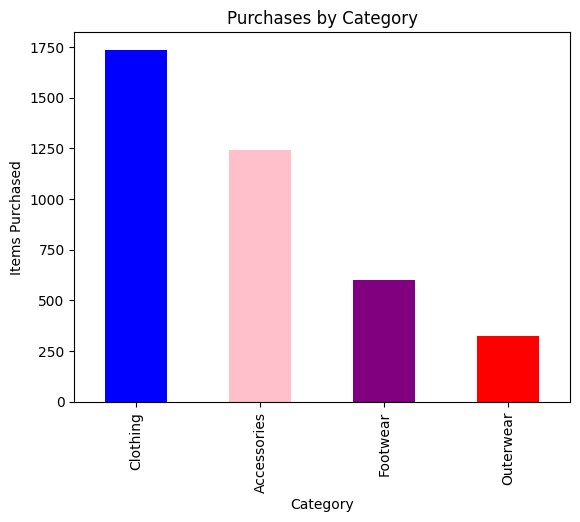

In [20]:
# Bar graph of the "Category" column

Category_count = data["Category"].value_counts()
Category_count.head()
Category_count.plot(kind = "bar", color = ['blue','pink','purple','red'], title = "Purchases by Category", ylabel = "Items Purchased")

Clothing has the best purchase history with outerwear having the lowest. 

<Axes: ylabel='count'>

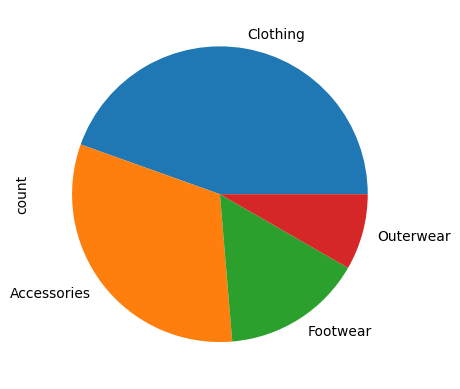

In [21]:
# Percentage of each category through pie chart 

Category_count.plot(kind = "pie")

In [22]:
# Group by location and category 

data.groupby("Location")["Category"].value_counts()

Location   Category   
Alabama    Clothing       41
           Accessories    25
           Footwear       15
           Outerwear       8
Alaska     Clothing       33
                          ..
Wisconsin  Outerwear       3
Wyoming    Clothing       31
           Accessories    23
           Footwear       11
           Outerwear       6
Name: count, Length: 200, dtype: int64

<Axes: title={'center': 'Customer Distribution by Location'}, xlabel='Location', ylabel='Number of Customers'>

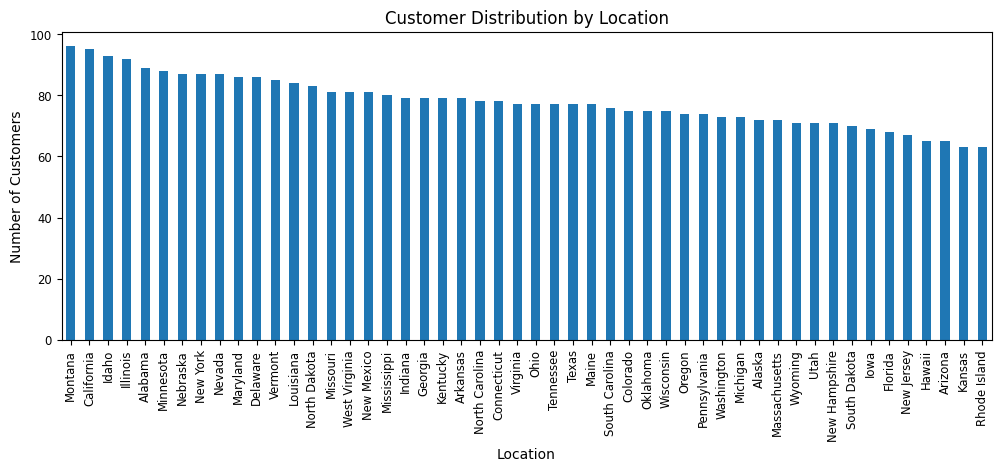

In [23]:
# Visualization for "Location" column distribution 

Location_count = data["Location"].value_counts()
Location_count.plot(kind = "bar", rot = 90, figsize = (12,4),fontsize = "small", title = "Customer Distribution by Location", ylabel = "Number of Customers")

Montana has the most customers out of every other location. Marketing campaigns might be targeted towards the smaller numbers such as Rhode Island to attract a new demographic of buyers. 

<Axes: title={'center': 'Distribution of Average Purchase by Location'}, xlabel='Location', ylabel='Average Purchase Price'>

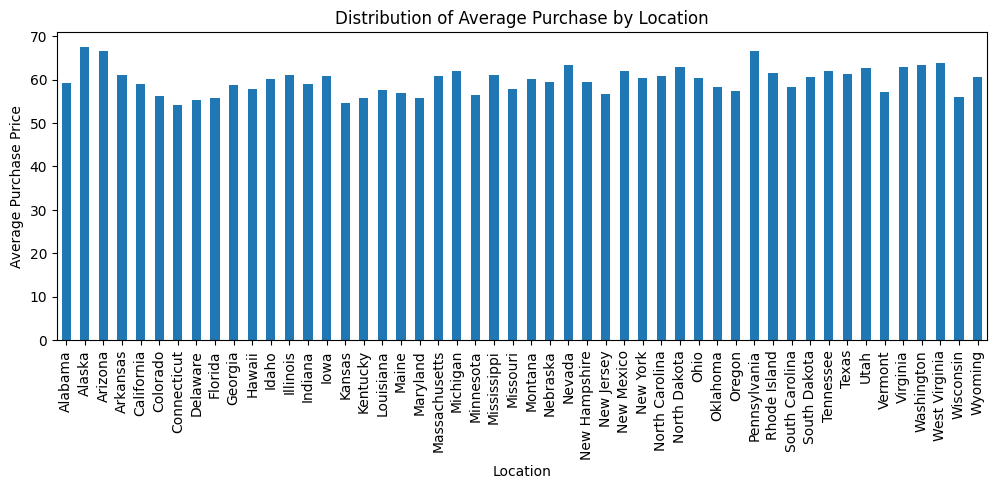

In [24]:
# Visualization for average purchase per region 

avg_price.plot(kind = "bar",figsize = (12,4), ylabel = "Average Purchase Price", title = "Distribution of Average Purchase by Location")

<Axes: ylabel='count'>

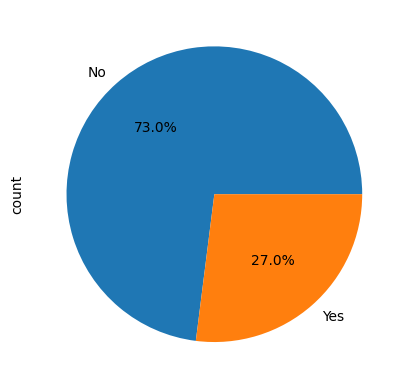

In [25]:
# Visualization for "Subscription Status"

subscription_type = data["Subscription Status"].value_counts()
subscription_type.plot(kind = "pie",  autopct = '%.1f%%')

<Axes: title={'center': 'Impact of Season on Purchase Amount'}, xlabel='Season', ylabel='Average Purchase Amount'>

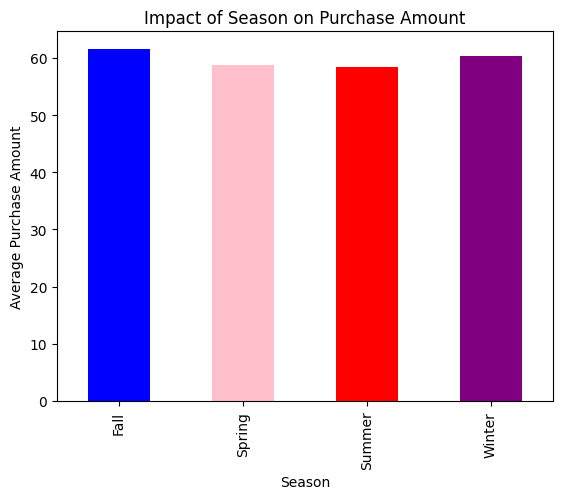

In [26]:
# Visualization for "Season" 

seasons = data['Season'].unique()
average_purchase_season = data.groupby('Season')['Purchase Amount (USD)'].mean()
average_purchase_season.plot(kind = "bar", title = "Impact of Season on Purchase Amount", ylabel = "Average Purchase Amount", xlabel = "Season", color = ['blue','pink','red','purple'])

Fall and Winter have the highest average purchase amount out of all the seasons. Spring and Summer average purchase amount is not far behind the higher two seasons. 

<Axes: title={'center': 'Payment Method'}, xlabel='Payment Method', ylabel='Number of Customers'>

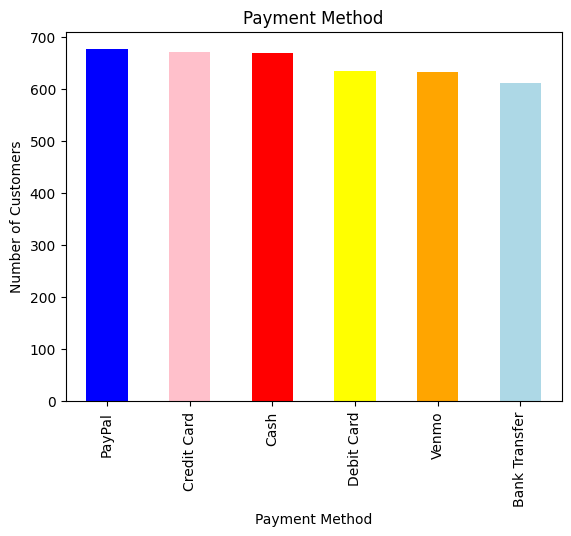

In [27]:
# Visualization for "Payment Method"

payment_method = data["Payment Method"].value_counts()
payment_method.plot(kind = "bar", color = ['blue','pink','red','yellow','orange','lightblue'], title = "Payment Method", ylabel = "Number of Customers", xlabel = "Payment Method")

<Axes: title={'center': 'Shipping Method'}, ylabel='Shipping Type'>

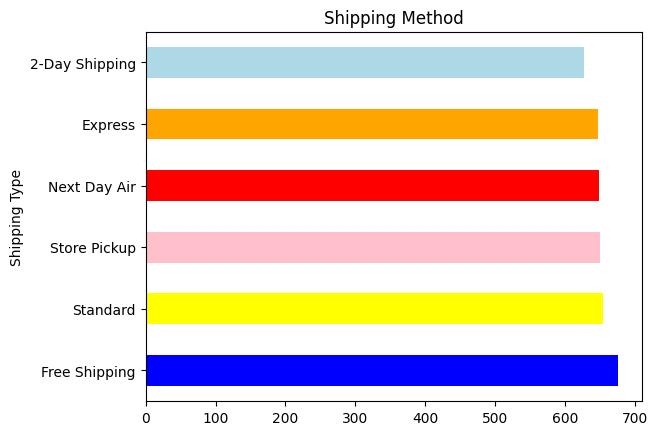

In [28]:
# Visualization for "Shipping Type"

shipping = data["Shipping Type"].value_counts()
shipping.plot(kind = "barh", title = "Shipping Method", color = ['blue','yellow','pink','red','orange','lightblue'])

<Axes: ylabel='count'>

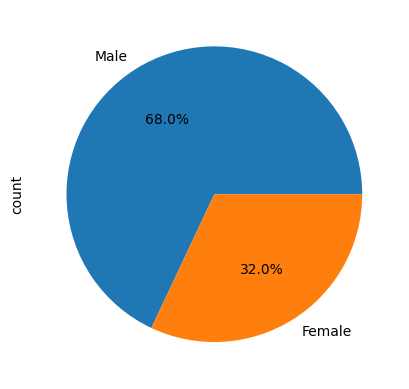

In [29]:
# Gender distribution 

gender_purchase = data['Gender'].value_counts()
gender_purchase.plot(kind = "pie", autopct = '%.1f%%')

Males contribute to more than half of the total purchases, making up 68% while females account for only %32 of total purchases. 

<Axes: title={'center': 'Purchases with Discount Applied'}, ylabel='count'>

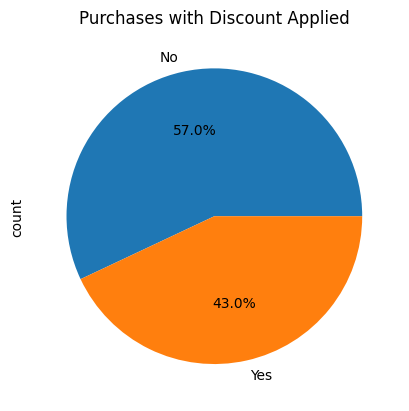

In [30]:
# Discount applied  

discount_applied = data["Discount Applied"].value_counts()
discount_applied.plot(kind = "pie", autopct = '%.1f%%', title = "Purchases with Discount Applied")

<Axes: title={'center': 'Impact of Promo Code Used on Purchase'}, ylabel='count'>

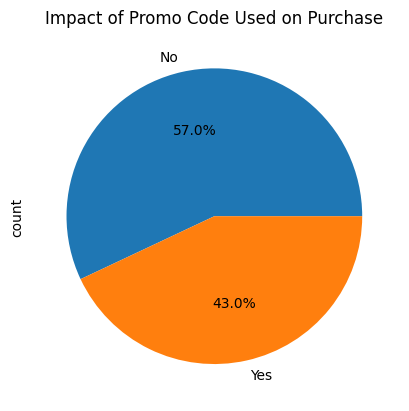

In [31]:
# Promo code used 

promocode_used = data["Promo Code Used"].value_counts()
promocode_used.plot(kind = "pie", autopct = '%.1f%%', title = "Impact of Promo Code Used on Purchase")

Discount and promo codes do not have a significant impact on purchasing behaviors. 

# Conclusion

* Customers make more purchases during winter and autumn compared to summer and spring. 
* The clothing category is the most popular among the locations with outerwear having a slightly lower amount than the other categories.
* Males make up 67% of total purchases with females accounting for 32% of the total.
* Montana has the most customers out of all locations.
* The average order value is $60.00
* Customers prefer Free Shipping
* Clothing is the most popular category among all customers and consumer demographics. 
* 73% of the customers are not subscribers.
* Customers using discounts and promotional codes does not have a significant impact on purchase behaviors.


The analysis of customer purchase behavior has unconvered valuable insights. Seasonality, gender, item categories and subscription type all play a role in purchase patterns. The data indicates that Montana makes up a big part of the consumer market for these products, preferring clothing. These findings can inform market strategies, product offerings, and promotions to more effectively target consumers. 